<a href="https://colab.research.google.com/github/AYA0HASSAN/LogisticRegression/blob/main/LogisticRegressionLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression From Scratch
#### Authors : Aya Hassan 

In [ ]:
! pip install plotly-express

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from colorama import Fore
import plotly.express as px


## Functions

In [ ]:
def sigmoid(y):
    return 1/(1+np.exp(-y))

In [ ]:
def gradientDescent(features,yHat,label):
    return np.dot(features.T ,(yHat - label)) / label.shape[0]

In [ ]:
def updateWeightLoss(weight , learningRate , gradient):
    return weight - learningRate * gradient

In [ ]:
def loss(yHat,label):
    return (- label * np.log(yHat) - (1-label) * np.log(1-yHat)).mean()

y = a1x1 + a2x2 + b 

In [ ]:
def logisicRegression(features,labels,iterations,learningRate = 0.001):
    
    # Initizalize Weights
    features = np.c_[np.ones((features.shape[0],1)),features]
    dimention = features.shape[1]
    weight = np.zeros((dimention,1))
    weight_history = np.zeros((iterations,dimention))
    costs = np.zeros(iterations)
    hypothesis = np.zeros((iterations,len(labels)))
    loops = 0
    
    for i in range(iterations):
        # predict y(target)
        yHat = np.dot(features,weight)
        yHat = sigmoid(yHat)
        gradient = gradientDescent(features,yHat,labels)
        weight = updateWeightLoss(weight,learningRate,gradient)
        yHat = np.dot(features,weight)
        yHat = sigmoid(yHat)
        costs[i] = loss(yHat,labels)
        weight_history[i,:] = weight.T
        hypothesis[i,:] = yHat.T
        loops +=1
        # Stop Conditions
        if i > 1 :
            if abs(costs[i-1] - costs[i]) <= 1e-6:
                break
        
    return weight, weight_history, costs, hypothesis, loops

In [ ]:
def predict(features,label, theta):
    summ=0
    features = np.c_[np.ones((features.shape[0],1)),features]
    yHat = np.dot(features,theta)
    ySig = sigmoid(yHat)
    result = pd.DataFrame(np.around(ySig,decimals=4)).join(label)
    
    result['Prediction'] = result[0].apply(lambda x:0 if x <= 0.5 else 1)
    
    for i in range(len(label)):
        if result['Prediction'].values[i] == label.values[i]:
            summ+=1
    # print("====================",summ/len(label))
    
    #print("=========",accuracy_score(label,result['Prediction'].values))
    #print(result)
    return summ/len(label)# accuracy_score(label,result['Prediction'].values)#result

## Load Data

In [ ]:
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

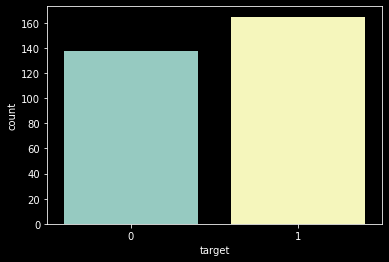

In [ ]:
sns.countplot(data['target'])

Our data is not perfectly balanced but also doesn't have a huge difference between the two classes that difference is reasonable

### Spliting into Train Test

data (train) is 70%
test is 30%

In [ ]:
np.random.seed(123)
test = data.sample(frac=0.30)
idx = list(test.index)
for i in idx:
    data = data.drop(i)

# Feature Selection

## Visualization

Distribution of each feature

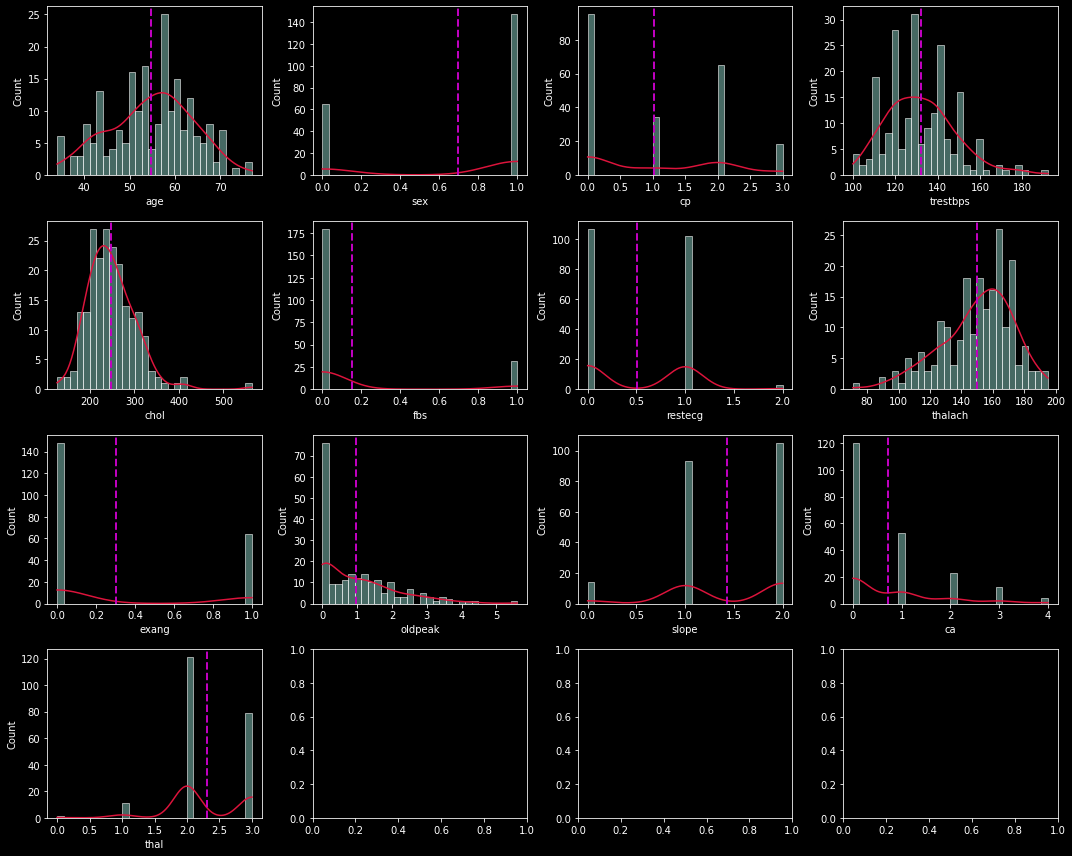

In [ ]:
features = data.drop('target',axis=1)
target = data[['target']]
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(features, ax.flatten()):
    g=sns.histplot(data[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=data[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

#### From histogram we notice that features that have a reltively normal distribution and other are categories 

Heatmap for get correlation between feature to ensure that there is no redundant features or highly correlated features

<AxesSubplot:>

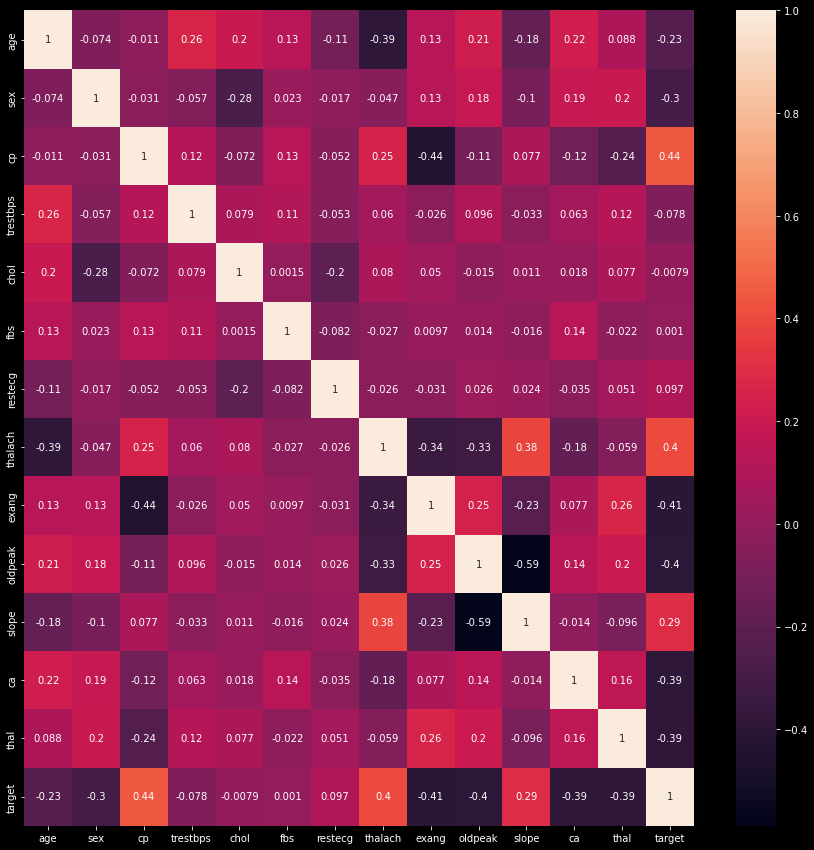

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

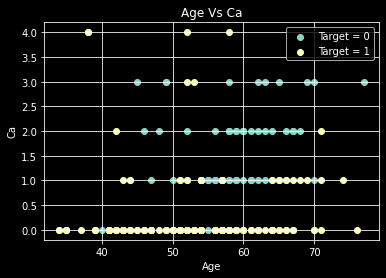

In [ ]:

plt.scatter(x=data['age'].loc[data['target'] == 0],y=data['ca'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['age'].loc[data['target'] == 1],y=data['ca'].loc[data['target'] == 1],label = "Target = 1")

plt.xlabel("Age")
plt.ylabel("Ca")
plt.grid()
plt.title("Age Vs Ca")
plt.legend()

In [ ]:
fig = px.scatter_3d(data, x='age', y='ca',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'Age Vs Chol')

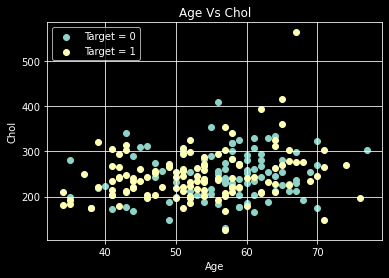

In [ ]:

plt.scatter(x=data['age'].loc[data['target'] == 0],y=data['chol'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['age'].loc[data['target'] == 1],y=data['chol'].loc[data['target'] == 1],label = "Target = 1")

plt.xlabel("Age")
plt.ylabel("Chol")
plt.grid()
plt.legend()
plt.title("Age Vs Chol")

In [ ]:
fig = px.scatter_3d(data, x='age', y='chol',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'Thalach Vs Trestbps')

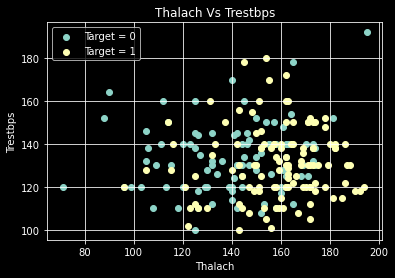

In [ ]:
# trestbps
plt.scatter(x=data['thalach'].loc[data['target'] == 0],y=data['trestbps'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['thalach'].loc[data['target'] == 1],y=data['trestbps'].loc[data['target'] == 1],label = "Target = 1")
plt.xlabel("Thalach")
plt.ylabel("Trestbps")
plt.grid()
plt.legend()
plt.title("Thalach Vs Trestbps")

Text(0.5, 1.0, 'Thalach Vs Cp')

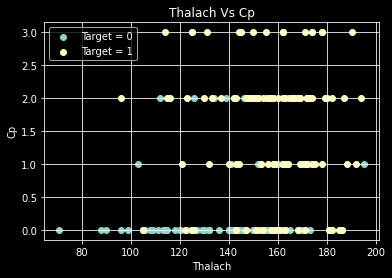

In [ ]:
# cp
# plt.scatter(x=data['thalach'],y=data['cp'])
plt.scatter(x=data['thalach'].loc[data['target'] == 0],y=data['cp'].loc[data['target'] == 0],label = "Target = 0")
plt.scatter(x=data['thalach'].loc[data['target'] == 1],y=data['cp'].loc[data['target'] == 1],label = "Target = 1")

plt.xlabel("Thalach")
plt.ylabel("Cp")
plt.grid()
plt.legend()
plt.title("Thalach Vs Cp")

Text(0.5, 1.0, 'Sex Vs Chol')

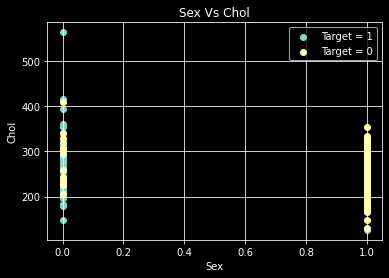

In [ ]:
plt.scatter(x=data['sex'].loc[data['target'] == 1],y=data['chol'].loc[data['target'] == 1],label = "Target = 1")
plt.scatter(x=data['sex'].loc[data['target'] == 0],y=data['chol'].loc[data['target'] == 0],label = "Target = 0")

plt.xlabel("Sex")
plt.ylabel("Chol")
plt.legend()
plt.grid()
plt.title("Sex Vs Chol")

In [ ]:
fig = px.scatter_3d(data, x='sex', y='chol',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Text(0.5, 1.0, 'Sex Vs Cp')

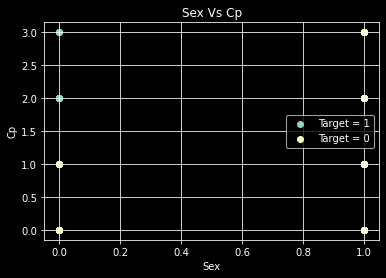

In [ ]:
plt.scatter(x=data['sex'].loc[data['target'] == 1],y=data['cp'].loc[data['target'] == 1],label = "Target = 1")
plt.scatter(x=data['sex'].loc[data['target'] == 0],y=data['cp'].loc[data['target'] == 0],label = "Target = 0")

plt.xlabel("Sex")
plt.ylabel("Cp")
plt.legend()
plt.grid()
plt.title("Sex Vs Cp")

In [ ]:
fig = px.scatter_3d(data, x='sex', y='cp',z = 'target',color='target')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

using 3D Graphs give better interpretation for the data 
most features are linearly separable so we will loop over all feature combination to get best TWO 

## Results

#### Logistic Regressin Model without any type of normallization just selecting two features (all possible combinations) and get best accuracy of these two features

In [ ]:

new_data = data.drop('target',axis=1)
feature = new_data.columns
iterations = 500
alpha = 1e-4
label = data[['target']]

current_train_accuracy = []
current_test_accuracy = []
best_accuracy_train = 0.0
best_accuracy_test = 0.0
best_feature = []

for f1 in range(len(feature)):
    for f2 in range(len(feature)):
        if f2 > f1 :
            
            new_features = pd.DataFrame([data[feature[f1]],data[feature[f2]]] ).T  
            # calling functions
            weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
            prediction_train = predict(new_features,label, weight)
            prediction_test = predict(test[[feature[f1],feature[f2]]],test[['target']],weight) 
            print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format(feature[f1],feature[f2]))
            print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
            print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
            print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
            print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
            print(Fore.BLACK +"Number of Iterations = {}".format(loops))
            
            current_train_accuracy.append(prediction_train)
            #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
            current_test_accuracy.append(prediction_test) 
            #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
            print(Fore.CYAN + "Train Accuracy = {}".format(prediction_train))
            print(Fore.CYAN + "Test Accuracy = {}".format(prediction_test))
            if prediction_train > best_accuracy_train:
                best_accuracy_train = prediction_train
                best_feature = []
                best_feature.append([feature[f1],feature[f2]])
            if prediction_test > best_accuracy_test:
                best_accuracy_test = prediction_test
print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))
print(Fore.GREEN + "Best Features = {}".format(best_feature))


Logistic Regression Info. of age and sex:- 
Bias = 0.0001384927434636151
Weight_0 = 0.002921679567876305
Weight_1 = -0.0001976281125687083
Cost/Loss = 0.6896436056523332
Number of Iterations = 43
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and cp:- 
Bias = 0.0010529173797236787
Weight_0 = 0.0027809690367313514
Weight_1 = 0.012471391740048425
Cost/Loss = 0.6865340991419397
Number of Iterations = 500
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and trestbps:- 
Bias = 0.00042829226641997157
Weight_0 = -0.019863526931215167
Weight_1 = 0.009841764567226156
Cost/Loss = 0.6766916321641927
Number of Iterations = 500
Train Accuracy = 0.5566037735849056
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and chol:- 
Bias = 0.00048686760929284744
Weight_0 = -0.017451373981177083
Weight_1 = 0.004668272145773497
Cost/Loss = 0.6776834466946348
Number of Iterations = 

We get Best Accuracy from cp and ca features

Text(0.5, 1.0, 'Test Accuracy')

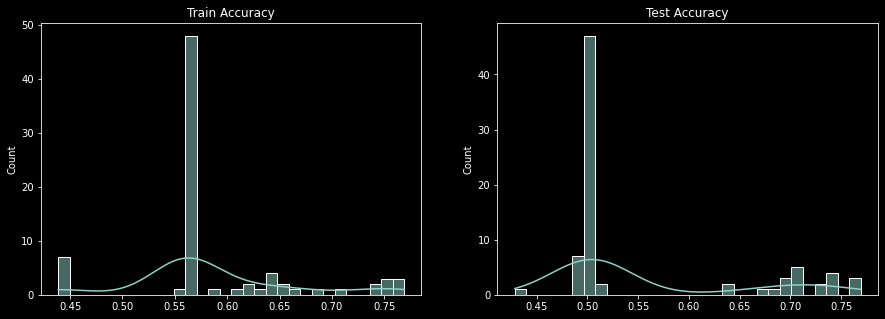

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(current_train_accuracy,bins=30, kde=True,ax=axes[0])
axes[0].set_title('Train Accuracy')
sns.histplot(current_test_accuracy,bins=30, kde=True,ax=axes[1])
axes[1].set_title('Test Accuracy')

#### With Normalization(Standardization)  Data
##### mean = 0 , std = 1

In [ ]:

new_data = data.drop('target',axis=1)
feature = new_data.columns
iterations = 500
alpha = 1e-4
label = data[['target']]


current_train_accuracy = []
current_test_accuracy = []
best_accuracy_train = 0.0
best_accuracy_test = 0.0
best_feature = []

for f1 in range(len(feature)):
    for f2 in range(len(feature)):
        if f2 > f1 :
            
            new_features = pd.DataFrame([data[feature[f1]],data[feature[f2]]] ).T
            
            # standardization
            
            new_features[feature[f1]] = (new_features[feature[f1]] - new_features[feature[f1]].mean()) / new_features[feature[f1]].std()  
            new_features[feature[f2]] = (new_features[feature[f2]] - new_features[feature[f2]].mean()) / new_features[feature[f2]].std()  
            # calling functions
            weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
            prediction_train = predict(new_features,label, weight)
            prediction_test = predict(test[[feature[f1],feature[f2]]],test[['target']],weight) 
            print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format(feature[f1],feature[f2]))
            print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
            print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
            print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
            print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
            print(Fore.BLACK +"Number of Iterations = {}".format(loops))
            
            current_train_accuracy.append(prediction_train)
            #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
            current_test_accuracy.append(prediction_test) 
            #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
            print(Fore.CYAN + "Train Accuracy = {}".format(prediction_train))
            print(Fore.CYAN + "Test Accuracy = {}".format(prediction_test))
            if prediction_train > best_accuracy_train:
                best_accuracy_train = prediction_train
                best_feature = []
                best_feature.append([feature[f1],feature[f2]])
            if prediction_test > best_accuracy_test:
                best_accuracy_test = prediction_test

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))
print(Fore.GREEN + "Best Features = {}".format(best_feature))


Logistic Regression Info. of age and sex:- 
Bias = 0.0030469927328142343
Weight_0 = -0.005625717243633884
Weight_1 = -0.007363402038750497
Cost/Loss = 0.6912441302198301
Number of Iterations = 500
Train Accuracy = 0.6839622641509434
Test Accuracy = 0.4945054945054945
Logistic Regression Info. of age and cp:- 
Bias = 0.0030469928979126315
Weight_0 = -0.005621570401354782
Weight_1 = 0.01087436700135841
Cost/Loss = 0.689964417172563
Number of Iterations = 500
Train Accuracy = 0.7122641509433962
Test Accuracy = 0.4945054945054945
Logistic Regression Info. of age and trestbps:- 
Bias = 0.0030469925562693935
Weight_0 = -0.005619190406468927
Weight_1 = -0.0019171319273278695
Cost/Loss = 0.6922564807954643
Number of Iterations = 500
Train Accuracy = 0.6037735849056604
Test Accuracy = 0.4945054945054945
Logistic Regression Info. of age and chol:- 
Bias = 0.0030469925371219902
Weight_0 = -0.005622106461028754
Weight_1 = -0.00018813387512701892
Cost/Loss = 0.6923286269685525
Number of Iterations 

We get Best Accuracy from sex and ca features

Normalization(Standardization) enhanced accuracy a little bit and gets new features as the best features but the most powerful effect is that it gets higher accuracy in most features in other words increases the average of all accuracies  

Text(0.5, 1.0, 'Test Accuracy')

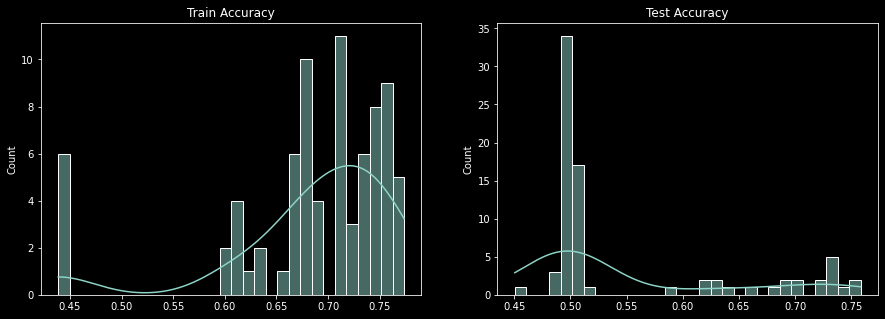

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(current_train_accuracy,bins=30, kde=True,ax=axes[0])
axes[0].set_title('Train Accuracy')
sns.histplot(current_test_accuracy,bins=30, kde=True,ax=axes[1])
axes[1].set_title('Test Accuracy')

#### Shuffling Data

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
np.random.seed(411)
data_shuffled = data.sample(frac=1.0).reset_index(drop=True)
data_shuffled.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
1,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
2,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
3,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
4,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0


In [ ]:
data_shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [ ]:
new_data = data_shuffled.drop('target',axis=1)
feature = new_data.columns
iterations = 500
alpha = 1e-4
label = data_shuffled[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0

for f1 in range(len(feature)):
    for f2 in range(len(feature)):
        if f2 > f1 :
            
            new_features = pd.DataFrame([data_shuffled[feature[f1]],data_shuffled[feature[f2]]] ).T
            
            # standardization
            
            # new_features[feature[f1]] = (new_features[feature[f1]] - new_features[feature[f1]].mean()) / new_features[feature[f1]].std()  
            # new_features[feature[f2]] = (new_features[feature[f2]] - new_features[feature[f2]].mean()) / new_features[feature[f2]].std()  
            
            # calling functions
            
            weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
            prediction_train = predict(new_features,label, weight)
            prediction_test = predict(test[[feature[f1],feature[f2]]],test[['target']],weight) 
            print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format(feature[f1],feature[f2]))
            print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
            print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
            print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
            print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
            print(Fore.BLACK +"Number of Iterations = {}".format(loops))
            
            current_train_accuracy = prediction_train
            #prediction_train.loc[prediction_train['Prediction']==prediction_train['target']].shape[0] / prediction_train.shape[0] * 100
            current_test_accuracy = prediction_test
            #prediction_test.loc[prediction_test['Prediction']==prediction_test['target']].shape[0] / prediction_test.shape[0] * 100
            print(Fore.CYAN + "Train Accuracy = {}".format(current_train_accuracy))
            print(Fore.CYAN + "Test Accuracy = {}".format(current_test_accuracy))
            if current_train_accuracy > best_accuracy_train:
                best_accuracy_train = current_train_accuracy
            if current_test_accuracy > best_accuracy_test:
                best_accuracy_test = current_test_accuracy

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))


Logistic Regression Info. of age and sex:- 
Bias = 0.00013849274346361512
Weight_0 = 0.002921679567876305
Weight_1 = -0.0001976281125687083
Cost/Loss = 0.6896436056523332
Number of Iterations = 43
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and cp:- 
Bias = 0.0010529173797236787
Weight_0 = 0.0027809690367313505
Weight_1 = 0.012471391740048429
Cost/Loss = 0.6865340991419394
Number of Iterations = 500
Train Accuracy = 0.5613207547169812
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and trestbps:- 
Bias = 0.00042829226641997184
Weight_0 = -0.01986352693121521
Weight_1 = 0.009841764567226172
Cost/Loss = 0.6766916321641928
Number of Iterations = 500
Train Accuracy = 0.5566037735849056
Test Accuracy = 0.5054945054945055
Logistic Regression Info. of age and chol:- 
Bias = 0.0004868676092928476
Weight_0 = -0.01745137398117708
Weight_1 = 0.004668272145773495
Cost/Loss = 0.6776834466946342
Number of Iterations = 50

Shuffling data doesn't improve accuracy in other words doesn't make the model more general  

##### Change Learning Rate

In [ ]:
iterations = 500
alphas = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
best_alpha = 0
label = data[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0

current_train_accuracy = []
current_test_accuracy = []

for alpha in alphas :
    new_features = data[['cp','ca']]
    weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,iterations,alpha)
    prediction_train = predict(new_features,label, weight)
    prediction_test = predict(test[['cp','ca']],test[['target']],weight) 
    current_train_accuracy.append(prediction_train)
    current_test_accuracy.append(prediction_test)
    print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format('cp','ca'))
    print(Fore.BLACK +"Learning Rate = {}".format(alpha))
    print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
    print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
    print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
    print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
    print(Fore.BLACK +"Number of Iterations = {}".format(loops))
    print(Fore.CYAN + "Train Accuracy = {}".format(prediction_train))
    print(Fore.CYAN + "Test Accuracy = {}".format(prediction_test))
    
    if prediction_train > best_accuracy_train:
        best_accuracy_train = prediction_train
        best_alpha = alpha
    if prediction_test > best_accuracy_test:
        best_accuracy_test = prediction_test

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))
print(Fore.GREEN + "Best Learning Rate = {}".format(best_alpha))


Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.1
Bias = -0.04348564112934115
Weight_0 = 1.0081236774939495
Weight_1 = -0.9232908371961164
Cost/Loss = 0.5084753720002172
Number of Iterations = 299
Train Accuracy = 0.7452830188679245
Test Accuracy = 0.7582417582417582
Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.01
Bias = 0.03638634265972913
Weight_0 = 0.6389988510378193
Weight_1 = -0.5302797706641558
Cost/Loss = 0.5309068882743722
Number of Iterations = 500
Train Accuracy = 0.7641509433962265
Test Accuracy = 0.7472527472527473
Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.001
Bias = 0.02371952542812612
Weight_0 = 0.12934964946080849
Weight_1 = -0.07361631357721912
Cost/Loss = 0.647530551719338
Number of Iterations = 500
Train Accuracy = 0.7547169811320755
Test Accuracy = 0.7692307692307693
Logistic Regression Info. of cp and ca:- 
Learning Rate = 0.0001
Bias = 0.002987253378496644
Weight_0 = 0.014436777443356892
Weight_1 = -0.0074279508180555955

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Test Accuracy')

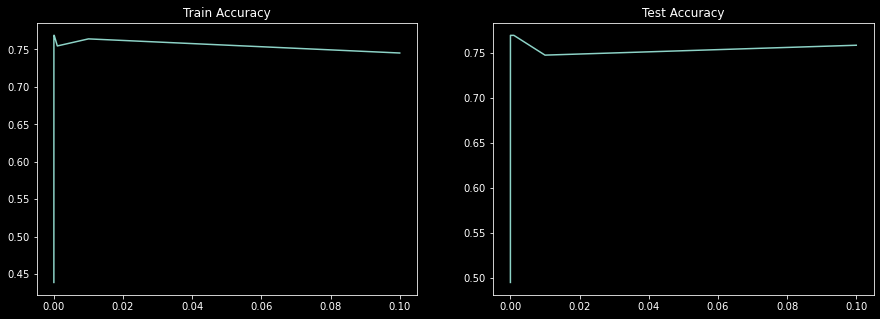

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(alphas,current_train_accuracy,x = alphas,y = current_train_accuracy,ax=axes[0])
axes[0].set_title('Train Accuracy')
sns.lineplot(alphas,current_test_accuracy,x = alphas,y = current_train_accuracy,ax=axes[1])
axes[1].set_title('Test Accuracy')

Here we tried Very big learning rate (step) that leads to a relatively generalized model and less numer of iterations that safe alot of time but in some situations it may overshouts while when we use a very small learning rate that leads to alot of iterations and if it too small it may never reach local min.

##### Change Iterations

In [ ]:
iterations = [2,4,8,10,20,100,500,1500]
alpha = 0.0001
label = data[['target']]

best_accuracy_train = 0.0
best_accuracy_test = 0.0
current_train_accuracy = []
current_test_accuracy = []

for i in iterations :
    new_features = data[['cp','ca']]
    # print(new_features)
    weight, weight_history, costs, hypothesis, loops = logisicRegression(new_features,label,i,alpha)
    prediction_train = predict(new_features,label, weight)
    prediction_test = predict(test[['cp','ca']],test[['target']],weight) 
    current_train_accuracy.append(prediction_train)
    current_test_accuracy.append(prediction_test)
    print(Fore.MAGENTA + "Logistic Regression Info. of {} and {}:- ".format('cp','ca'))
    print(Fore.BLACK +"Bias = {}".format(weight[0][0]))
    print(Fore.BLACK +"Weight_0 = {}".format(weight[1][0]))
    print(Fore.BLACK +"Weight_1 = {}".format(weight[2][0]))
    print(Fore.BLACK +"Cost/Loss = {}".format(costs[loops-1]))
    print(Fore.BLACK +"Number of Iterations = {}".format(loops))
    print(Fore.CYAN + "Train Accuracy = {}".format(prediction_train))
    print(Fore.CYAN + "Test Accuracy = {}".format(prediction_test))
    
    if prediction_train > best_accuracy_train:
        best_accuracy_train = prediction_train
        best_alpha = alpha
    if prediction_test > best_accuracy_test:
        best_accuracy_test = prediction_test

print(Fore.GREEN + "Best Train Accuracy = {}".format(best_accuracy_train))
print(Fore.GREEN + "Best Test Accuracy = {}".format(best_accuracy_test))


Logistic Regression Info. of cp and ca:- 
Bias = 1.226351039627117e-05
Weight_0 = 5.848906005251041e-05
Weight_1 = -2.9716976320532183e-05
Cost/Loss = 0.6931249087277557
Number of Iterations = 2
Train Accuracy = 0.4386792452830189
Test Accuracy = 0.4945054945054945
Logistic Regression Info. of cp and ca:- 
Bias = 2.452445882261791e-05
Weight_0 = 0.00011697209655363667
Weight_1 = -5.943393325906207e-05
Cost/Loss = 0.6931026407383085
Number of Iterations = 4
Train Accuracy = 0.6367924528301887
Test Accuracy = 0.6043956043956044
Logistic Regression Info. of cp and ca:- 
Bias = 4.9038671513978524e-05
Weight_0 = 0.0002339201020176866
Weight_1 = -0.00011886778790367801
Cost/Loss = 0.6930581162842229
Number of Iterations = 8
Train Accuracy = 0.75
Test Accuracy = 0.7472527472527473
Logistic Regression Info. of cp and ca:- 
Bias = 6.129193665309392e-05
Weight_0 = 0.00029238507253844903
Weight_1 = -0.00014858468506668578
Cost/Loss = 0.6930358598178704
Number of Iterations = 10
Train Accuracy = 0

we notice that the more iterations the model make the more generalized and the gradient descent get better values but it may fall in local min. that can't get away from and in other situation where the number of iterations is so big that the stopping condition in Logistic Regression function will use as the difference between loss_0 and loss_1 is very small that there is no learning   

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Test Accuracy')

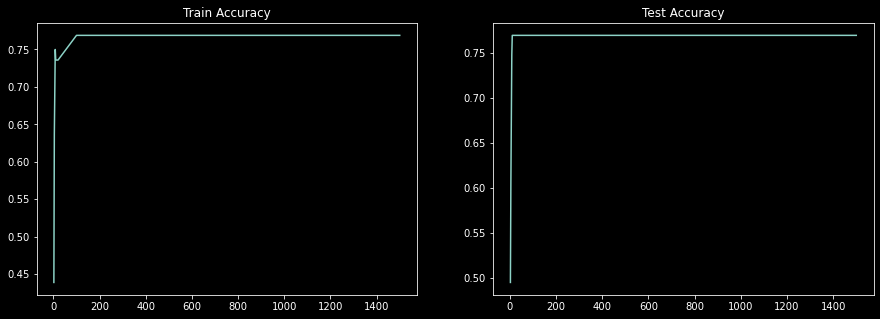

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(iterations,current_train_accuracy,x = iterations,y = current_train_accuracy,ax=axes[0])
axes[0].set_title('Train Accuracy')
sns.lineplot(iterations,current_test_accuracy,x = iterations,y = current_train_accuracy,ax=axes[1])
axes[1].set_title('Test Accuracy')